# <div align='center'> 阿里产品数据集 </div>

In [1]:
%matplotlib inline

In [2]:
import os
import shutil
import json
import random
from IPython.display import Image
from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT

In [3]:
dataset_root = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'aliproducts')

In [4]:
def _mkdir(phase):
    img_dir = os.path.join(dataset_root, 'imgs', phase)
    if not os.path.exists(img_dir):
        os.makedirs(img_dir)
    return img_dir

In [5]:
train_imgs_dir = _mkdir('train')
test_imgs_dir = _mkdir('test')

In [6]:
lables = []
images = []
train_dict = {}
first_image = None
with os.scandir(train_imgs_dir) as it0:
    for entry in it0:
        label = int(entry.name)
        lables.append(label)
        train_dict[label] = []
        with os.scandir(entry.path) as it:
            for e in it:
                if first_image is None:
                    first_image = e.path
                images.append(e.name)
                train_dict[label].append(f'{entry.name}/{e.name}')

In [7]:
lables.sort(), lables[:5], len(lables), len(images)

(None, [0, 1, 2, 3, 4], 195, 4937)

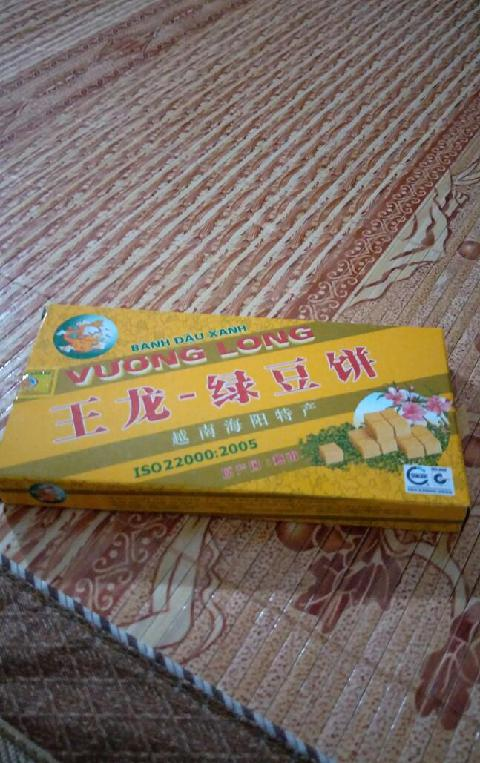

In [8]:
Image(first_image, width=300, height=100)

In [9]:
def generate_json_file(filename, label_dict):
    objects = []
    for label, files in label_dict.items():
        for img in files:
            objects.append({
                'image_path': f'imgs/train/{img}',
                'label': label
            })
    with open(os.path.join(dataset_root, filename), 'w') as fw:
        fw.write(json.dumps(objects))

In [10]:
val_test_dict = {}
for label, files in train_dict.items():
    val_test_dict[label] = random.sample(files, int(len(files)*0.4))
    
val_dict = {}
test_dict = {}
for label, files in val_test_dict.items():
    val_files = random.sample(files, int(len(files)*0.5))
    test_files = list(set(files) - set(val_files))
    val_dict[label] = val_files
    test_dict[label] = test_files

In [11]:
generate_json_file('train.json', train_dict)
generate_json_file('val.json', val_dict)
generate_json_file('test.json', test_dict)

In [12]:
for label in sorted(train_dict):
    if label > 9:
        break
    print(label, f'imgs/train/{train_dict[label][0]}')

0 imgs/train/00000/0000207.jpg
1 imgs/train/00001/0002695.jpg
2 imgs/train/00002/0003457.jpg
3 imgs/train/00003/0004241.png
4 imgs/train/00004/0000269.jpg
5 imgs/train/00005/0002744.jpg
6 imgs/train/00006/0000337.jpg
7 imgs/train/00007/0004147.jpg
8 imgs/train/00008/0000444.jpg
9 imgs/train/00009/0003115.jpg
